# Unsupervisded Sentiment Analysis by word2vec + K-means clustering (2)

#### By Joyce Jiang | Code by Joyce

### There are three steps of this unsupervised NPL analysis: 
(1) word2vec model training

(2) K-means clustering to group words into positive and negative clusters

(3) Perform unsupervised NLP and predict sentiments of data sample

### Citation & Source of my code
Declare: Though I have prior knowledge of conducting text categorization through word2vec and K-means, my script (from 1 to 3) is almost fully adapted from rafaljanwojciki's tutorial on GitHub, under his repo Unsupervised-Sentiment-Analysis, you can check it out at https://github.com/rafaljanwojcik/Unsupervised-Sentiment-Analysis.

Thanks rafaljanwojciki for explaining in a digestible way for me to understand fully how to use word2vec and k-means for a supervised NLP. This script is published for study and research exploration purpose only, and it would not be used for any commercial purpose. 

In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [3]:
word_vectors = Word2Vec.load("word2vec.model").wv

#### Perform K-means clustering

In [4]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=100).fit(X=word_vectors.vectors)
#model = KMeans(n_clusters=2).fit(X=word_vectors.vectors)

#### Check each cluster to identify positive and negative word categories
Notice: from the list of cluster 0 and cluster 1, we can see that my clustering analysis fail. I expected to split all words into two clusters: positive and negative clusters. 

However, cluster 1 seems to include neutral English words, such as "gradually" and "topics", instead of negative sentiments. On the other hand, cluster 0 is even unreadble for me, which seems to be words from Ugandan language. 

In [5]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None)

[('amendments', 0.997768759727478),
 ('fashion', 0.9976840615272522),
 ('tho', 0.9975180625915527),
 ('ucuniversity', 0.9973746538162231),
 ('intended', 0.9971514940261841),
 ('topics', 0.9971147775650024),
 ('gradually', 0.9970362186431885),
 ('24hrs', 0.9970162510871887),
 ('logical', 0.9968476891517639),
 ('availed', 0.9968141317367554)]

In [6]:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=10, restrict_vocab=None)

[('llawhi', 0.9980438947677612),
 ('llawhu', 0.9958956241607666),
 ('wwnm77', 0.9939264059066772),
 ('08oooo', 0.9934002161026001),
 ('alaa', 0.9932929873466492),
 ('hk', 0.9932655096054077),
 ('x1te', 0.9920466542243958),
 ('xatbb5', 0.9914953708648682),
 ('sobjzdmqdjpusrc', 0.9912265539169312),
 ('okutambura', 0.9912216663360596)]

In [7]:
# Label positive and negative clusters

positive_cluster_center = model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]

#### Visualize K-means clusters to show segmentation of positive and negative words 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [9]:
X=word_vectors.vectors
y_kmeans = model.predict(X=word_vectors.vectors)

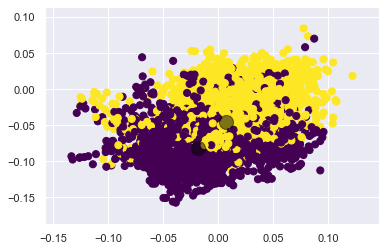

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [12]:
model.cluster_centers_

array([[-1.84309930e-02, -8.10622126e-02,  1.03540599e-01,
        -4.18054573e-02,  7.96982944e-02,  2.81530302e-02,
        -4.67754975e-02, -3.82235758e-02, -8.02680105e-02,
        -5.17853014e-02, -6.28162026e-02, -7.38152117e-03,
         2.69473568e-02, -2.35057622e-02,  1.52247772e-02,
        -1.98606625e-02,  2.19503045e-02,  1.75991431e-02,
         3.17382067e-02, -6.65738136e-02,  5.71671203e-02,
        -4.02750038e-02,  9.62008238e-02, -2.51403768e-02,
        -3.54686193e-02,  5.09826019e-02, -6.32452546e-03,
         3.73313837e-02,  3.48819867e-02,  2.08372623e-02,
         6.68557510e-02, -5.76829500e-02, -3.47568579e-02,
        -3.84495966e-03,  5.16091548e-02,  2.27782708e-02,
         3.63550819e-02,  2.81717665e-02,  1.21627171e-02,
        -3.39220278e-02, -5.09197637e-02,  2.72966661e-02,
        -1.80189740e-02, -4.32366766e-02, -5.74402586e-02,
         4.61621061e-02,  9.97903943e-03, -7.18510374e-02,
        -1.67450663e-02, -2.25262791e-02,  9.61618498e-0

#### Create a sentiment dictionary with positive and negative words

In [13]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

C:\Users\Joyce\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [15]:
words.head(20)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,his,"[-0.018767415, -0.048252225, 0.02021301, -0.03...",1,-1,1.541801,-1.541801
1,excellency,"[0.016338203, -0.041681863, 0.035007153, -0.02...",1,-1,2.303346,-2.303346
2,president,"[-0.00036725297, -0.034679458, 0.043592393, -0...",1,-1,1.693540,-1.693540
3,uganda,"[0.03428426, -0.021360042, 0.025045253, -0.043...",1,-1,1.340455,-1.340455
4,kagutamuseveni,"[0.010540089, 0.009039715, 0.013841405, -0.015...",1,-1,1.665278,-1.665278
5,efforts,"[0.037830036, -0.015962327, 0.02072848, -0.037...",1,-1,1.806787,-1.806787
6,of,"[0.0042020357, -0.010686769, 0.0026818612, -0....",1,-1,1.689863,-1.689863
7,ahmadiyya,"[0.0064451457, -0.06904614, 0.08753762, -0.039...",1,-1,4.528517,-4.528517
8,muslim,"[0.014709141, -0.05248879, 0.04811847, -0.0213...",1,-1,3.423650,-3.423650
9,community,"[-0.011178953, -0.03522192, -0.005465674, -0.0...",1,-1,1.476040,-1.476040


In [16]:
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

### Comparison

Inspired by myself: The rationale of this section is to perform a cluster analysis with more than 2 clusters (I tried both 3 and 4 clusters). My thought is that if I'm able to separate Ugandan words from English words, I will be able to label the rest of clusters as positive and negative words. However, the clustering failed again. Even after I clustered all words into 4 clusters, Ugandan words keep showing up in more than one cluster, which means I'm unable to separate it from the rest clusters. 

In [25]:
model_test = KMeans(n_clusters=4, max_iter=1000, random_state=True, n_init=100).fit(X=word_vectors.vectors)

In [26]:
word_vectors.similar_by_vector(model_test.cluster_centers_[0], topn=10, restrict_vocab=None)

[('amendments', 0.9982542991638184),
 ('24hrs', 0.9975922107696533),
 ('ucuniversity', 0.9972624778747559),
 ('tho', 0.9971891641616821),
 ('unwell', 0.9971678256988525),
 ('pointing', 0.9971514344215393),
 ('topics', 0.9970439076423645),
 ('servant', 0.9970022439956665),
 ('downfall', 0.9969593286514282),
 ('intended', 0.9969490766525269)]

In [27]:
word_vectors.similar_by_vector(model_test.cluster_centers_[1], topn=10, restrict_vocab=None)

[('rfwn', 0.9987783432006836),
 ('ysyh', 0.9987436532974243),
 ('hby', 0.9986025094985962),
 ('ysl', 0.9984983205795288),
 ('ydry', 0.9984703063964844),
 ('hzn', 0.9984621405601501),
 ('bshrk', 0.9984170198440552),
 ('lmshry', 0.9983982443809509),
 ('lkhys', 0.9983959794044495),
 ('khkhkh', 0.9983935952186584)]

In [28]:
word_vectors.similar_by_vector(model_test.cluster_centers_[2], topn=10, restrict_vocab=None)

[('subi', 0.9921970367431641),
 ('sein', 0.9911866188049316),
 ('tala', 0.989264965057373),
 ('pille', 0.9890443682670593),
 ('bio', 0.987855851650238),
 ('alle', 0.9873303771018982),
 ('ebongo', 0.9861972332000732),
 ('1998', 0.9860200881958008),
 ('rendez', 0.9854157567024231),
 ('deu', 0.9843083620071411)]

In [29]:
word_vectors.similar_by_vector(model_test.cluster_centers_[3], topn=10, restrict_vocab=None)

[('kigezo', 0.998649001121521),
 ('wakubwa', 0.9984312057495117),
 ('tembo', 0.9983195662498474),
 ('utakuta', 0.9983181357383728),
 ('kafanya', 0.9981686472892761),
 ('kabisaa', 0.998045802116394),
 ('rasmi', 0.9978135228157043),
 ('jamii', 0.9977713823318481),
 ('unakaa', 0.9977626800537109),
 ('tofali', 0.9977328777313232)]

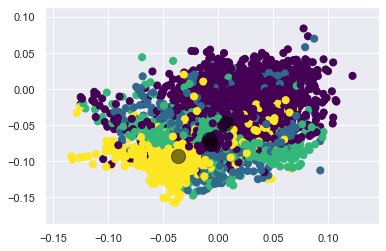

In [30]:
X=word_vectors.vectors
y_kmeans = model_test.predict(X=word_vectors.vectors)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model_test.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### Notice: My cluster analysis failed. My prediction result is not reliable, so does my accuracy test :(.  But it's still meaningful to learn this unsupervised NLP. My model failed because there were so many non-English words in my train dataset. I would suggest to continue reading Section 3 so you can have a comprehensive understanding of this method.